# [Applied Statistics](https://lamastex.github.io/scalable-data-science/as/2019/)
## 1MS926, Spring 2019, Uppsala University 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 07. Modular Arithmetic, Linear Congruential Generators, and Pseudo-Random Numbers


- What's this all about?
- Modular Arithmetic
- Linear Congruential Generators
- More Sophisticated Pseudo-Random Number Generators
- Accumulating sequences with `numpy.cumsum`
- Simulating a Drunkard's Walk
 

# What's this all about?

### Question: 

How can we produce realisations from Uniform$(0,1)$, the **fundamental random variable**?

i.e., how can we produce samples $(x_1, x_2, \ldots, x_n)$ from $X_1, X_2, \ldots, X_n$ $\overset{IID}{\thicksim}$ Uniform$(0,1)$?

What is Sage doing when we ask for `random()`?

In [9]:
random()

0.40919741319011693

### Answer:

Modular arithmetic and number theory gives us pseudo-random number generators.

 

### Question:

What can we do with samples from a Uniform$(0,1)$ RV?  Why bother?

### Answer:

We can use them to sample or simulate from other, more complex, random variables.  These simulations can be used to understand real-world phenomenon such as:

- modelling traffic queues on land, air or sea for supply chain management
- estimate missing data in Statistical survey to better manage or administer
- helping a Hospital to manage critical care for pre-term babies
- helping NZ's Department of Conservation to minimise the extinction probability of various marine organisms
- help the Government find if certain fishing boats are illegally under-reporting their catches from NZ's waters
- find cheaper air tickets for a vacation
- various physical systems can be modeled. See http://en.wikipedia.org/wiki/Monte_Carlo_method for a bigger picture.

See how the modern history of Monte carlo starts in Los Alamos!

In [10]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('http://en.wikipedia.org/wiki/Monte_Carlo_method',600)


The starting point for Monte Carlo methods is modular arithmetic ...

# Modular arithmetic

Modular arithmetic (arithmetic modulo $m$) is a central theme in number theory and is crucial for generating random numbers from a computer (i.e., *machine-implementation of probabilistic objects*).  Being able to do this is essential for computational statistical experiments and methods that help do this are called Monte Carlo methods.  Such computer-generated random numbers are technically called *pseudo-random numbers*.

In this notebook we are going to learn to add and multiply modulo $m$ (this part of our notebook is adapted from William Stein's SageMath worksheet on Modular Arithmetic for the purposes of linear congruential generators).  If you want a more thorough treatment see http://en.wikipedia.org/wiki/Modular_arithmetic.

In [11]:
showURL("http://en.wikipedia.org/wiki/Modular_arithmetic",500)

Remember when we talked about the modulus operator `%`?  The modulus operator gives the remainder after division:

In [12]:
14%12 # "14 modulo 12" or just "14 mod 12"

2

In [13]:
zeroto23Hours = range(0,24,1)  # 0,1,2...,23 hours in the 24-hours clock
print(zeroto23Hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [14]:
[x%12 for x in range(0,24,1)]  # x%12 for the 24 hours in the analog clock

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [15]:
set([x%12 for x in range(0,24,1)]) # unique hours 0,1,2,...,11 in analog clock by making a set out of the list

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

Arithmetic modulo $m$ is like usual arithmetic, except every time you add or multiply, you also divide by $m$ and return the remainder.  For example, working modulo $m=12$, we have:

$$8 + 6 = 14 = 2$$

since $2$ is the remainder of the division of $14$ by $12$.  

Think of this as like the hours on a regular analog clock.  We already  do modular addition on a regular basis when we think about time, for example when answering the question:

Question: If it is 8pm now then what time will it be after I have spent the 6 hours that I am supposed to dedicate this week toward this course?  

Answer: 2am.

Modular addition and multiplication with numbers modulo $m$ is well defined, and has the following properties:

- $a + b = b+a$     (addition is commutative)
- $a \cdot b = b \cdot a$     (multiplication is commutative)
- $a\cdot (b + c) = a\cdot b + a\cdot c$    (multiplication is distributive over addition)
- If $a$ is coprime to $m$ (i.e., not divisible by any of the same primes), then there is a unique $b$ (mod $m$) such that $a\cdot b=1$.

Let us make a matrix of results from addition and multiplication modulo 4.

Before that realise that arithmetic over a set $\mathbb{M}$ is merely a function from the Cartesian product $\mathbb{M} \times \mathbb{M}$ of all pairs in $\mathbb{M}$ to $\mathbb{M}$:

$$
\star : \mathbb{M} \times \mathbb{M} \to \mathbb{M}
$$

where $\star$ is usually $+$ for "addition" or $*$ for "multiplication".

Thus, we can think of arithmetic as a set of three-tuples:
$$(x_1, x_2, x_3) \in \mathbb{M}^3 := \mathbb{M} \times \mathbb{M} \times \mathbb{M}, \quad \text{where} \quad x_3 = x_1 \star x_2. $$

In [16]:
mySageMatrix = matrix(2,3,[1, 2, 3, 4, 5, 6]) # this is how you make a 2X3 matrix in Sage
mySageMatrix

[1 2 3]
[4 5 6]

In [17]:
type(mySageMatrix) # the type says a lot

<type 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>

In [18]:
# uncomment next line and put cursor after . and hit Tab to see available methods
#mySageMatrix.

Let us list all the three-tuples for addition modulo 4 next.

In [19]:
m=4;
# list (i,j, (i+j) mod m) as (i,j) range in [0,1,2,3]
[(i,j,(i+j)%m) for i in range(m) for j in range(m)]

[(0, 0, 0),
 (0, 1, 1),
 (0, 2, 2),
 (0, 3, 3),
 (1, 0, 1),
 (1, 1, 2),
 (1, 2, 3),
 (1, 3, 0),
 (2, 0, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 3, 1),
 (3, 0, 3),
 (3, 1, 0),
 (3, 2, 1),
 (3, 3, 2)]

In [20]:
[(i+j)%m for i in range(m) for j in range(m)] # just the third element of the three-tuple from above

[0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]

Since the arguments to addition modulo m are fixed in a square array $[0,1,2\ldots,m-1]\times[0,1,2\ldots,m-1]$ we can simply focus on the image of the arithmetic modulo $m$ operation and place it over the square array using the following matrix call:

In [21]:
#addition mod m
matrix(m,m,[(i+j)%m for i in range(m) for j in range(m)])

[0 1 2 3]
[1 2 3 0]
[2 3 0 1]
[3 0 1 2]

In [22]:
# multiplication mod m
matrix(m,m,[(i*j)%m for i in range(m) for j in range(m)])

[0 0 0 0]
[0 1 2 3]
[0 2 0 2]
[0 3 2 1]

## Visualize Modular Arithmetic
In the following interactive image (created by William Stein) we make an addition and multiplication table modulo $m$, where you can control $m$ with the slider.   Try changing $m$ and seeing what effect it has:

In [23]:
import matplotlib.cm
cmaps = ['gray'] + list(sorted(matplotlib.cm.datad.keys()))

@interact
def mult_table(m=(4,(1..200)), cmap=("Color Map",cmaps)):
    Add = matrix(m,m,[(i+j)%m for i in range(m) for j in range(m)])
    Mult = matrix(m,m,[(i*j)%m for i in range(m) for j in range(m)])
    print "Addition and multiplication table modulo %s"%m
    show(graphics_array( (plot(Add, cmap=cmap),plot(Mult, cmap=cmap))),figsize=[10,5])

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIG11bHRfdGFibGUgYXQgMHg3ZmE0OTczZmQ0MTA+IHdpdGggMiB3aWRnZXRzCiAgbTogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXXigKY=


Look at this for a while.  Make $m$ close to 200 slowly and see how the outputs of the two arithmetic operations change.

Answer the following questions (which refer to the default colour map) to be sure you understand the table:

- Question: Why is the top row and leftmost column of the multiplication table always black?
- Question: Why is there an anti-diagonal block line in the addition table (the left-most table)?
- Question: Why are the two halves of each table (the two pictures) symmetric about the diagonal?

You can change the colour map if you want to.

### YouTry

You should be able to understand a bit of what is happening here.  See that there are two list comprehensions in there.  Take the line `matrix(m,m,[(i+j)%m for i in range(m) for j in range(m)])`.  The list comprehension part is `[(i+j)%m for i in range(m) for j in range(m)]`.  Let's pull it out and have a look at it.  We have set the default modulo `m` to `4` but you could change it if you want to:

In [24]:
m = 4
listFormAdd = [(i+j)%m for i in range(m) for j in range(m)]
listFormAdd

[0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]

This list comprehension doing double duty:  remember that a list comprehension is like a short form for a for loop to create a list?  This one is like a short form for one for-loop nested within another for-loop.  

We could re-create what is going on here by making the same list with two for-loops.  This one uses modulo `m = 4` again.

In [25]:
m = 4
listFormAddTheHardWay = []
for i in range(m):
    for j in range(m):
        listFormAddTheHardWay.append((i+j)%m)
listFormAddTheHardWay

[0, 1, 2, 3, 1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2]

Notice that the last statement in the list comprehension, `for j in range(m)`, is the inner loop in the nested for-loop.

The next step that Stein's  interactive image is to make a `matrix` out of the `list`.   We won't be doing matrices in detail in this course (we decided to concentrate on `numpy.arrays` and multi-dimensional `numpy.ndarrays` with floating-point numbers for numerical computing instead), but if you are interested, this statement uses the `matrix` function to make a `matrix` out of the `list` named `listFormAdd`.  The dimensions of the matrix are given by the first two arguments to the `matrix` function: `(m, m,...)`. 

In [26]:
matrixForm = matrix(m,m, listFormAdd)
matrixForm

[0 1 2 3]
[1 2 3 0]
[2 3 0 1]
[3 0 1 2]

Optionally, you can find out more about matrices from the documentation.

In [27]:
#uncomment and evaluate next line for doc
#?matrix

### YouTry
Try recreating the matrix for multiplication, just as we have just recreated the one for addition.

In [28]:
m = 4
listFormMultiply = [] # make the list non-empty!

In [29]:
listFormMultiply

[]

## Modular arithmetic in SageMath

The simplest way to create a number modulo $m$ in Sage is to use the Mod(a,m) command.  We illustrate this below.

In [30]:
Mod(8, 12)

8

Let's assign it to a variable so that we can explore it further:

In [31]:
myModInt = Mod(8, 12)
myModInt

8

In [32]:
type(myModInt)

<type 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>

In [33]:
parent(myModInt)

Ring of integers modulo 12

We will compare myModInt to a "normal" SageMath integer:

In [34]:
myInt = 8
myInt

8

In [35]:
type(myInt)

<type 'sage.rings.integer.Integer'>

In [36]:
parent(myInt) # ZZ

Integer Ring

We can see that `myModInt` and `myInt` are different types, but what does this mean?  How do they behave? 

Try addition:

In [37]:
myModInt + 6

2

In [38]:
myInt + 6

14

Was this what you already expected?

What about multiplication?

In [39]:
myModInt * 6

0

In [40]:
myInt * 6

48

What's going on here?  As we said above, arithmetic modulo mm is like usual arithmetic, except every time you add or multiply, you also divide by mm and return the remainder.  8 x 6 is 48, and the remainder of 48 divided by 12 (12 is our modulo) is 0. 

What about this one? What's happening here? 

In [41]:
Mod(-45,2018) # Raaz was born in the year

1973

In [42]:
Mod(-1,12)  # what's an hour before mid-night

11

### YouTry
Can you create the number giving your year of birth (±1 year) in a similar way. For example, if you are 19 years old now then find the number -19 modulo 2018.



Let us assign 10 modulo 12 to a variable named `now`:

In [43]:
now = Mod(10, 12)
now

10

<img src="images/Week6NowEquals10.png" width=200>

### YouTrys

Add -1 to `now`: <img src="images/Week6NowEquals9.png" width=200>

Put in the expression to do this in SageMath into the cell below:

In [44]:
now -1

9


And subtract 13 from the previous expression.  <img src="images/Week6NowEquals8.png" width=250>

Put in the expression to do this in SageMath into the cell below:

In [45]:
now - 1 -13

8

Also try adding 14 to the previous expression -- the new postition is not shown on this clock but you should be able to see what it should be.  


<img src="images/Week6NowWas8.png" width=200>

Put in the expression to do this in SageMath into the cell below:
    

And multiplying 2 by `now` (or `now` by 2)

Try making and using some modular integers of your own. Make sure that you can predict the results of simple addition and multiplication operations on them: this will confirm that you understand what's happening. 

### YouTry Later!
What happens if you try arithmetic with two modular integers?  Does it matter if the moduli of both operands a and b in say a+b are the same if a and b are both modular integers?  Does this make sense to you?

(end of YouTrys)

---

---

# Linear Congruential Generators

A linear congruential generator (LCG) is a simple *pseudo-random number generator (PRNG)* - a simple way of imitating samples or realizations from the Uniform$(0,1)$.  

"Pseudo-random" means that the numbers are not really random [From Ancient Greek ψευδής (pseudḗs, “false, lying”)].

We will look at what we mean by that as we find out about linear congruential generators. 

The theory behind LCGs is easy to understand, and they are easily implemented and fast.

To make a LCG we need:

- a modulus $m$ ($m > 0$)
- an integer multiplier $a$ ($0 \le a < m$)
- an integer increment $c$ ($0 \le c < m$)
- an integer seed $x_0$ ($0 \le x_0 < m$)
- an integer sequence length $n$

Using these inputs, the LCG generates numbers $x_1, x_2, \ldots x_{n-1} $ where $x_{i+1}$ is calculated from $x_i$ as defined by the following recurrence relation:

$$x_{i+1} \gets mod \left(a x_i + c , m \right)$$

In the above expression $\gets$ denotes "gets" as in variable assignment.

$x_0,x_1,\ldots,x_{n-1}$ is the sequence of pseudo-random numbers called the linear congruential sequence.



We can define a function parameterised by $(m,a,c,x_0,n)$ to give us a linear congruential sequence in the form of a list. 

(Remember about function parameters?  The function **parameters** here are `m`, `a`, `c`, `x0`, and `n`.  Note that the **return value** of the function is a list.  

## Implementing the LCG

Let's see how we can define a function for our LCG next.'

In [46]:
def linConGen(m, a, c, x0, n):
    '''A linear congruential sequence generator.
    
    Param m is the integer modulus to use in the generator.
    Param a is the integer multiplier.
    Param c is the integer increment.
    Param x0 is the integer seed.
    Param n is the integer number of desired pseudo-random numbers.
    
    Returns a list of n pseudo-random integer modulo m numbers.'''
    
    x = x0 # the seed
    retValue = [Mod(x,m)]  # start the list with x=x0
    for i in range(2, n+1, 1):
        x = mod(a * x + c, m) # the generator, using modular arithmetic
        retValue.append(x) # append the new x to the list
    return retValue

You know enough SageMath/Python to understand what every line in the above function `linConGen` is doing!

The function is merely implementing the pseudocode or algorithm of the linear congruential generator using a for-loop and modular arithmetic:  note that the generator produces integers modulo $m$.

## Linear Congruential Generators:  the Good, the Bad, and the Ugly

Are all linear congruential generators as good as each other?  What makes a good LCG?

One desirable property of a LCG is to have the longest possible period.   

The **period** is the length of sequence we can get before we get a repeat.  The longest possible period a LCG can have is $m$.  Lets look at an example.  

In [47]:
?mod

In [48]:
# first assign values to some variables to pass as arguments to the function
m  = 17  # set modulus to 17
a  = 2   # set multiplier to 2
c  = 7   # set increment to 7
x0 = 1   # set seed to 1
n  = 18  # set length of sequence to 18 = 1 + maximal period 
L1 = linConGen(m, a, c, x0, n) # use our linConGren function to make the sequence
L1                    # this sequence repeats itself with period 8

[1, 9, 8, 6, 2, 11, 12, 14, 1, 9, 8, 6, 2, 11, 12, 14, 1, 9]

You should be able to see the repeating pattern `9, 8, 6, 2, 11, 12, 14`.  If you can't you can see that the sequence actually contains 8 unique numbers by making a set out of it:

In [49]:
Set(L1)                        # make a Sage Set out of the sequence in the list L1

{1, 2, 6, 8, 9, 11, 12, 14}

Changing the seed $x_0$ will, at best, make the sequence repeat itself over other numbers but with the same period:

In [50]:
x0 = 3             # leave m, a, c as it is but just change the seed from 1 to 3 here
L2 = linConGen(m, a, c, x0, n)
L2                 # changing the seed makes this sequence repeat itself over other numbers but also with period 8

[3, 13, 16, 5, 0, 7, 4, 15, 3, 13, 16, 5, 0, 7, 4, 15, 3, 13]

In [51]:
Set(L2)                        # make a Sage Set out of the sequence in the list L2

{0, 3, 4, 5, 7, 13, 15, 16}

At worst, a different `seed` specified by `x0` might make the sequence get stuck immediately:

In [52]:
x0 = 10            # leave m, a, c as it is but just change the seed to 10
L3 = linConGen(m, a, c, x0, n)
L3

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [53]:
Set(L3)                        # make a Sage Set out of the sequence in the list L3

{10}

An LCG is just a discrete determinstic dynamical system and each seed acts as the initial condition with different behaviours. The behaviour above can be seen as a *fixed point* at 10 for this LCG initialized at 10.

In [54]:
Set(L3)+Set(L2)+Set(L1) # + on Sage Sets gives the union of the three Sets and it is the set of integers modulo 17

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

Thus, the three sequences with different initial conditions or seeds cover all the points in our **Ring of integers modulo 17**.

What about changing the multiplier $a$?

In [55]:
m  = 17 # same as before
a  = 3  # change the multiplier from 2 to 3 here
c  = 7  # same as before
x0 = 1  # set seed at 1 
n  = 18 # set length of sequence to 18 = 1 + maximal period
L4 = linConGen(m, a, c, x0, n)
L4                             # now we get a longer period of 16 but with the number 5 missing

[1, 10, 3, 16, 4, 2, 13, 12, 9, 0, 7, 11, 6, 8, 14, 15, 1, 10]

In [56]:
Set(L4)

{0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [57]:
x0 = 5  # just change the seed to 5
linConGen(m, a, c, x0, n)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

We want an LCG with a **full period** of $m$ so that we can use it with any seed and not get stuck at fixed points or short periodic sequences. This is a minimal requirement for simulation purposes that we will employ such sequences for.  Is there anyway to know what makes a LCG with a full period?  

It turns out that an LCG will have a full period if and only if:

- $c$ and $m$ are relatively prime or coprime.  i.e. the **greatest common divisor (gcd)** of $c$ and $m$ is $1$; and
- $a-1$ is divisible by all **prime factors** of $m$; and
- $a-1$ is a multiple of 4 if $m$ is a multiple of 4.

(Different conditions apply when $c=0$.  The Proposition and Proof for this are in Knuth, The Art of Computer Programming, vol. 2, section 3.3).

SageMath has a function `gcd` which can calculate the greatest common divisor of two numbers:

In [58]:
?gcd

In [59]:
gcd(7,17)

1

SageMath can also help us to calculate **prime factors** with the `prime_factors` function:

In [60]:
prime_factors(m)

[17]

In [61]:
prime_factors(7634887623876428376482746)

[2, 25504980841, 149674443424853]

$(m, a, c, x0, n) = (256, 137, 123, 13, 256)$ gives a linear congruential sequence with the longest possible period of 256.  Let us see how these parameters satisfy the above three requirements while those earlier with $m=17$, $a=2$, and $c=7$ do not.

In [62]:
(m,a,c,x0,n)=(256, 137, 123, 13, 256) # faster way to assign a bunch of parameters

In [63]:
gcd(c,m)         # checking if the greatest common divisor of c and m is indeed 1

1

In [64]:
prime_factors(m)   # it is easy to get a list of all the prime factors of m

[2]

In [65]:
(a-1) % 2             # checking if a-1=136 is divisible by 2, the only prime factors of m

0

In [66]:
[ (a-1)%x for x in prime_factors(m) ]   # a list comprehension check for an m with more prime factors

[0]

In [67]:
m % 4         # m is a multiple of 4 check

0

In [68]:
(a-1) % 4       # if m is a multiple of 4 then a-1 is also a multiple of 4

0

In [69]:
(m, a, c, x0, n)  # therefore these parameter values satisfy all conditions to have maximum period length m

(256, 137, 123, 13, 256)

Thus, the parameters $(m,  a,  c,  x_0,  n) = (256, 137, 123, 13, 256)$ do indeed satisfy the three conditions to guarantee the longest possible period of 256.  

In contrast, for the LCG example earlier with $m=17$, $a=2$, and $c=7$, although $m$ and $c$ are relatively prime, i.e., $gcd(m,c)=1$, we have the violation that $a-1=2-1=1$ is not divisible by the only prime factor $17$ of $m=17$.  Thus, we cannot get a period of maximal length $17$ in that example.

In [70]:
[ (2-1)%x for x in prime_factors(17) ]

[1]

Let us see if the parameters $(m, a, c, x_0, n) = (256, 137, 123, 13, 256)$ that satisfy the three conditions to guarantee the longest possible period of 256 do indeed produce such a sequence:

In [71]:
(m,a,c,x0,n)=(256, 137, 123, 13, 256) # faster way to assign a bunch of parameters
ourLcg = linConGen(m,a,c,x0,n)
print(ourLcg)

[13, 112, 107, 190, 41, 108, 71, 122, 197, 232, 163, 182, 225, 228, 127, 114, 125, 96, 219, 174, 153, 92, 183, 106, 53, 216, 19, 166, 81, 212, 239, 98, 237, 80, 75, 158, 9, 76, 39, 90, 165, 200, 131, 150, 193, 196, 95, 82, 93, 64, 187, 142, 121, 60, 151, 74, 21, 184, 243, 134, 49, 180, 207, 66, 205, 48, 43, 126, 233, 44, 7, 58, 133, 168, 99, 118, 161, 164, 63, 50, 61, 32, 155, 110, 89, 28, 119, 42, 245, 152, 211, 102, 17, 148, 175, 34, 173, 16, 11, 94, 201, 12, 231, 26, 101, 136, 67, 86, 129, 132, 31, 18, 29, 0, 123, 78, 57, 252, 87, 10, 213, 120, 179, 70, 241, 116, 143, 2, 141, 240, 235, 62, 169, 236, 199, 250, 69, 104, 35, 54, 97, 100, 255, 242, 253, 224, 91, 46, 25, 220, 55, 234, 181, 88, 147, 38, 209, 84, 111, 226, 109, 208, 203, 30, 137, 204, 167, 218, 37, 72, 3, 22, 65, 68, 223, 210, 221, 192, 59, 14, 249, 188, 23, 202, 149, 56, 115, 6, 177, 52, 79, 194, 77, 176, 171, 254, 105, 172, 135, 186, 5, 40, 227, 246, 33, 36, 191, 178, 189, 160, 27, 238, 217, 156, 247, 170, 117, 24, 83, 2

In [72]:
S = Set(ourLcg)  # sort it in a set to see if it indeed has maximal period of 256
S

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

ourLcg is an example of a **good** LCG. 

The next example will demonstrate what can go wrong.

Consider $m= 256$, $a = 136$, $c = 3$, $x_0 = 0$, $n = 15$. 

In [73]:
m,a,c,x0,n = 256, 136, 3, 0, 15
gcd(m,c)

1

In [74]:
prime_factors(m)

[2]

But, since $a-1=$135 is not divisible by 2, the only prime factor of $m=$256, we get into the fixed point 91 no matter where we start from.  

### YouTry 

See if changing the seed $x_0$ makes a difference?

In [75]:
linConGen(m, a, c, x0, n)

[0, 3, 155, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91]

We can look at the linear congruential sequence generated by $(m,a,c,x_0,n)=(256,137,0,123,256)$ from Knuth's classic [The Art of Computer Programming, vol. 2, Sec. 3.3.4, Table 1, Line 5] and compare it with `ourLcg`.

In [76]:
m, a, c, x0, n = 256, 137, 0, 123, 256
lcgKnuth334T1L5 = linConGen(m, a, c, x0, n)
print(lcgKnuth334T1L5)

[123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43, 3, 155, 243, 11, 227, 123, 211, 235, 195, 91, 179, 203, 163, 59, 147, 171, 131, 27, 115, 139, 99, 251, 83, 107, 67, 219, 51, 75, 35, 187, 19, 43,

In [77]:
Set(lcgKnuth334T1L5)

{51, 131, 139, 115, 147, 171, 27, 35, 43, 99, 91, 179, 155, 59, 19, 123, 83, 195, 211, 203, 11, 75, 163, 219, 3, 107, 67, 227, 235, 243, 187, 251}

Note that although `ourLcg` has maximal period of 256,  `lcgKnuth334T1L5` has period of  32.  Let us look at them as  points.

We can plot each number in the sequence, say `ourLcg`, against its index in the sequence -- i.e. plot the first number 13 against 0 as the tuple (0, 13), the second number against 1 as the tuple (1, 112), etc.   

To do this, we need to make a list of the index values, which is simple using `range(256)` which as you know will give us a list of numbers from 0 to 255 going up in steps of 1.   Then we can `zip` this list with the sequence itself to make the `list` of the desired `tuples`.

In [78]:
ourPointsToPlot = zip(range(256), ourLcg)
knuPointsToPlot = zip(range(256), lcgKnuth334T1L5)

Then we plot using `points` for `ourLcg` and for `lcgKnuth334T1L5`.

In [79]:
?text

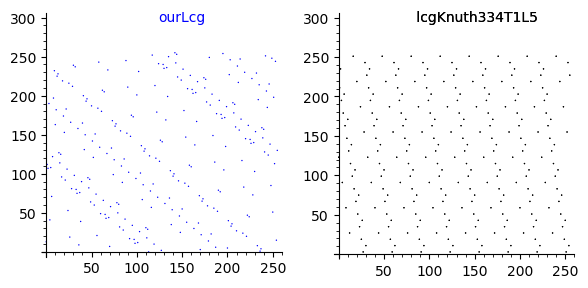

In [80]:
p1 = points(ourPointsToPlot, pointsize='1')
t1 = text('ourLcg', (150,300), rgbcolor='blue',fontsize=10) 
p2 = points(knuPointsToPlot, pointsize='1',color='black')
t2 = text(' lcgKnuth334T1L5', (150,300), rgbcolor='black',fontsize=10) 
show(graphics_array((p1+t1,p2+t2)),figsize=[6,3])

We can see that in section 3.3.4, Table 1, line 5 in The Art of Computer Programming, Knuth is giving an example of a particularly bad LCG.  

When we introducted LCGs, we said that using an LCG was a simple way to imiate independent samples from the Uniform$(0, 1)$ RV, but clearly so far we have been generating sequences of integers.  How does that help?

To get a simple pseudo-random Uniform$(0,1)$ generator, we scale the linear congruential sequence over [0, 1].  We can do this by dividing each element by the largest number in the sequence (256 in the case of `ourLcg`). 

**Important note:** The numbers in the list returned by our `linConGen` function are integers modulo $m$.

In [81]:
type(ourLcg[0])

<type 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>

You will need to convert these to Sage integers or Sage multi-precision floating point numbers using int() or RR() command before dividing by $m$.  Otherwise you will be doing modular arithmetic when you really want the usual division.  

In [82]:
type(RR(ourLcg[0]))

<type 'sage.rings.real_mpfr.RealNumber'>

Having sorted that out, we can use a  list comprehension as a nice neat way to do our scaling:



In [83]:
#ourLcgScaled = [RR(x)/256 for x in ourLcg]    # convert to mpfr real numbers before division
ourLcgScaled = [(RR(x)/256).n(digits=8) for x in ourLcg]    # convert to mpfr real numbers with non-zero digits
#ourLcgScaled = [int(x)/256 for x in ourLcg]  # or convert x to usual integer before division
#ourLcgScaled = [x/256 for x in ourLcg]       # a very bad idea
print(ourLcgScaled)

[0.050781250, 0.43750000, 0.41796875, 0.74218750, 0.16015625, 0.42187500, 0.27734375, 0.47656250, 0.76953125, 0.90625000, 0.63671875, 0.71093750, 0.87890625, 0.89062500, 0.49609375, 0.44531250, 0.48828125, 0.37500000, 0.85546875, 0.67968750, 0.59765625, 0.35937500, 0.71484375, 0.41406250, 0.20703125, 0.84375000, 0.074218750, 0.64843750, 0.31640625, 0.82812500, 0.93359375, 0.38281250, 0.92578125, 0.31250000, 0.29296875, 0.61718750, 0.035156250, 0.29687500, 0.15234375, 0.35156250, 0.64453125, 0.78125000, 0.51171875, 0.58593750, 0.75390625, 0.76562500, 0.37109375, 0.32031250, 0.36328125, 0.25000000, 0.73046875, 0.55468750, 0.47265625, 0.23437500, 0.58984375, 0.28906250, 0.082031250, 0.71875000, 0.94921875, 0.52343750, 0.19140625, 0.70312500, 0.80859375, 0.25781250, 0.80078125, 0.18750000, 0.16796875, 0.49218750, 0.91015625, 0.17187500, 0.027343750, 0.22656250, 0.51953125, 0.65625000, 0.38671875, 0.46093750, 0.62890625, 0.64062500, 0.24609375, 0.19531250, 0.23828125, 0.12500000, 0.60546875

This is more like it!  We could have a look at this on a plot.  Again again want tuples (index, element in scaled sequence at index position), which we can get using `range(256)` (to get the indexes 0, .., 255) and `zip`:

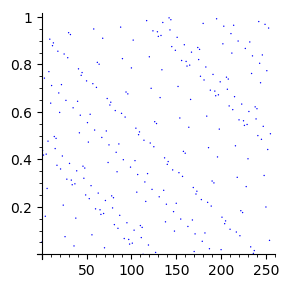

In [84]:
ourPointsToPlotScaled = zip(range(256), ourLcgScaled)
p = points(ourPointsToPlotScaled, pointsize='1')
show(p, figsize = (3,3))

Now we have points on the real line.  We could use a histogram to look at their distribution.  If we are hoping that our LCG, once we have scaled the results,  is imitating the Uniform$(0,1)$, what kind of shape would we want our histogram to be? 

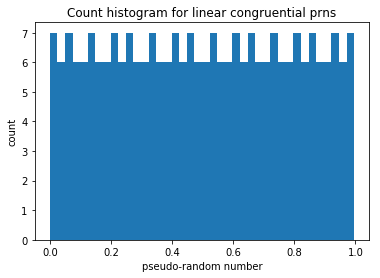

In [85]:
import pylab # This is a nice Python numerics module on top of mumpy
pylab.clf() # clear current figure
n, bins, patches = pylab.hist(ourLcgScaled, 40) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('pseudo-random number') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for linear congruential prns')
pylab.savefig('myHist', dpi=(50)) # save figure (dpi) to display the figure
pylab.show() # and finally show it

Is this roughly what you expected?

(Please note:  we are using the histogram plots to help you to see the data, but you are not expected to be able to make one yourself.)

We could repeat this for the Knuth bad LCG example:

In [86]:
%%sh
ls

00.ipynb
01.ipynb
02.ipynb
03.ipynb
04.ipynb
05.ipynb
06.ipynb
07.ipynb
08.ipynb
09.ipynb
10.ipynb
11.ipynb
13.ipynb
data
images
myHist.png


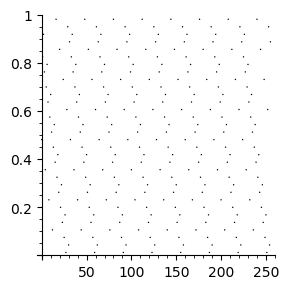

In [87]:
knuLcgScaled = [RR(x)/256 for x in lcgKnuth334T1L5] 
knuPointsToPlotScaled = zip(range(256), knuLcgScaled)
p = points(knuPointsToPlotScaled, pointsize='1', color='black')
show(p, figsize = (3,3))

And show it as a histogram.  Given the pattern above, what would you expect the histogram to look like?

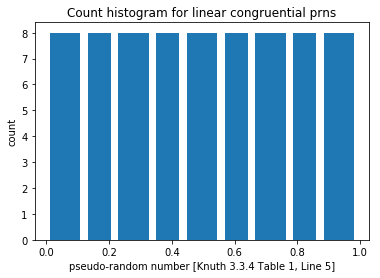

In [88]:
import pylab
pylab.clf() # clear current figure
n, bins, patches = pylab.hist(knuLcgScaled, 40) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('pseudo-random number [Knuth 3.3.4 Table 1, Line 5]') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for linear congruential prns')
pylab.savefig('myHist', dpi=(50)) # save figure (dpi) to display the figure
pylab.show() # and finally show it

## Larger LCGs

The above generators are cute but not useful for simulating Lotto draws with 40 outcomes.  Minimally, we need to increase the period length with a larger modulus $m$. 

But remember that the quality of the pseudo-random numbers obtained from a LCG is extremely sensitive to the choice of $m$, $a$, and $c$.  

To illustrate that having a large $m$ alone is not enough we next look at **RANDU**, an infamous LCG which generates sequences with strong correlations between 3 consecutive points, which can been seen if we manipulate the sequence to make 3-dimensional tuples out of groups of 3 consecutive points.  

In the cell below we make our scaled sequence in one step, using a list comprehension which contains the expression to generate the LCG and the scaling.   

In [89]:
m, a, c, x0, n = 2147483648, 65539, 0, 1, 5010
RANDU = [RR(x)/m for x in linConGen(m, a, c, x0, n)]

Have a look at the results as a histogram:

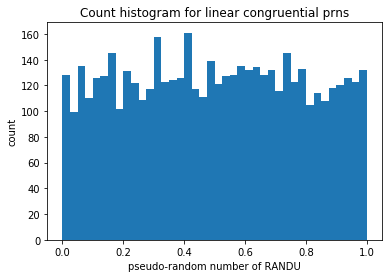

In [90]:
import pylab
pylab.clf() # clear current figure
n, bins, patches = pylab.hist(RANDU, 40) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('pseudo-random number of RANDU') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for linear congruential prns')
pylab.savefig('myHist', dpi=(50)) # save figure (dpi) to display the figure
pylab.show() # and finally show it

Now we are going to use some of the array techniques we have learned about to resize the sequence from the RANDU LCG to an array with two columns.  We can then `zip` the two columns together to make tuples (just pairs or two-tuples). 

In [91]:
import pylab
m, a, c, x0, n = 2147483648, 65539, 0, 1, 5010
randu = pylab.array(linConGen(m, a, c, x0, n))

In [92]:
pylab.shape(randu)

(5010,)

In [93]:
randu.resize(5010/2, 2) # resize the randu array to 2 columns

In [94]:
pylab.shape(randu)

(2505, 2)

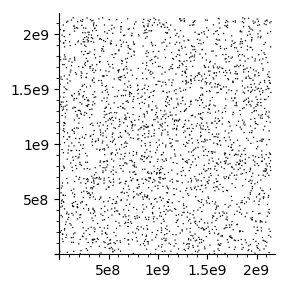

In [95]:
seqs = zip(randu[:, 0], randu[:, 1]) # zip to make tuples from columns
p = points(seqs, pointsize='1', color='black')
show(p, figsize = (3,3))

Let us resize the LCG to an array with three columns.  We can then zip the three columns together to make tuples.  The effect will be that if our original sequence was $x_0, x_1, x_2, x_3, \ldots, x_{n-3}, x_{n-2}, x_{n-1}$, we will get a list of triplets, tuples of length three, $(x_0, x_3, x_6), (x_1, x_4, x_7), \ldots, (x_{n-1-6}, x_{n-1-3}, x_{n-1})$.  Unlike the pairs in 2D which seem well-scattered and random, triplets from the RANDU LCG are not very random at all! They all lie on parallel planes in 3D. 

In [96]:
import pylab
m, a, c, x0, n = 2147483648, 65539, 0, 1, 5010
randu = pylab.array(linConGen(m, a, c, x0, n))
randu.resize(5010/3, 3) # resize the randu array to 3 columns
seqs = zip(randu[:, 0], randu[:, 1], randu[:, 2]) # zip to make tuples from columns
point3d(seqs, size=3)

Graphics3d Object

You can alter your perspective on this image using the mouse.  From a particular perspective you can see that something has gone horribly wrong ... **RANDU is a really ugly LCG**. 

The above generators are of low quality for producing pseudo-random numbers to drive statistical simulations. We end with a positive note with a LCG that is in use in the Gnu Compiler Collection. It does not have obvious problems as in small periods or as high a correlation as RANDU. 

In [97]:
#jmol error JmolInitCheck is not defined
import pylab
glibCGCCLcg = pylab.array([RR(x)/(2^32) for x in linConGen(2^32, 1103515245,12345,13,5010)])
glibCGCCLcg.resize(1670, 3) # resize the randu array to 3 columns
seqs = zip(glibCGCCLcg[:, 0], glibCGCCLcg[:, 1], glibCGCCLcg[:, 2]) # zip to make tuples from columns
point3d(seqs, size=3)

Graphics3d Object

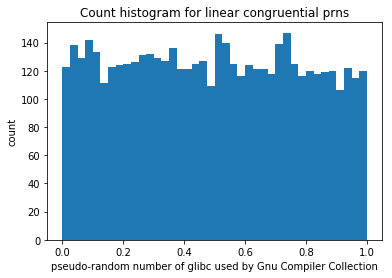

In [98]:
import pylab
glibCGCCLcg = pylab.array([RR(x)/(2^32) for x in linConGen(2^32, 1103515245,12345,13,5010)])
pylab.clf() # clear current figure
n, bins, patches = pylab.hist(glibCGCCLcg, 40) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('pseudo-random number of glibc used by Gnu Compiler Collection') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for linear congruential prns')
pylab.savefig('myHist',dpi=(50)) # seem to need to have this to be able to actually display the figure
pylab.show() # and finally show it

**Even good LCG are not suited for realistic statistical simulation problems**. 

This is because of the strong correlation between successive numbers in the sequence. For instance, if an LCG is used to choose points in an n-dimensional space, the points will lie on, at most, $m^{1/n}$ hyper-planes. There are various statistical tests that one can use to test the quality of a pseudo-random number generator. For example, the spectral test checks if the points are not on a few hyper-planes. Of course, the Sample Mean, Sample Variance, etc. should be as expected. Let us check those quickly:

Recall that the population mean for a Uniform$(0,1)$ RV is $\frac{1}{2}$ and the population variance is $\frac{1}{12}$.

In [99]:
glibCGCCLcg.mean()  # check that the mean is close to the population mean of 0.5 for Uniform(0,1) RV

0.49233286396638415

In [100]:
glibCGCCLcg.var()   # how about the variance

0.082447854409686105

In [101]:
1/12.0

0.0833333333333333

To go into this topic in detail is clearly beyond the scope of this course. You should just remember that using computers to generate pseudo-random numbers is not a trivial problem and use care when employing them especially in higher dimensional or less smooth problems. The mathematics behind this has one of the most beautiful roots of the subject called number theory.

## More Sophisticated Pseudo-Random Number Generators

We will use a pseudo-random number generator (PRNG) called the Mersenne Twister for simulation purposes in this course.  It is based on more sophisticated theory than that of LCG but the basic principles of recurrence relations are the same. 

(The Mersenne Twister is a variant of the recursive relation known as a twisted generalised feedback register.  See [Makato Matsumoto and Takuji Nishimura, "Mersenne Twister: A 623-dimensionally equidistributed uniform pseudo-random number generator, ACM Transactions on Modelling and Computer Simulation, vol. 8, no. 1, Jan. 1998, pp. 3-20.], or at http://en.wikipedia.org/wiki/Mersenne_twister.)

The Mersenne Twister has a period of $2^{19937}-1 \approx 10^{6000}$ (which is essentially a Very Big Number) and is currently widely used by researchers interested in statistical simulation.  

In [102]:
showURL("http://en.wikipedia.org/wiki/Mersenne_twister",500)

In [103]:
?random # find out the source file for this function

In [104]:
%%sh
# you can just cat or concatenate the source file to see what is really under the hoood! Power of SageMath/Python!!
#cat ~/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/misc/prandom.py

### Some Warmup before Simulating a Drunkard's Walk

#### Accumulating sequences with `numpy.cumsum`

Our example using prngs is going to use a very useful function from the `numpy` module called `cumsum`.  This calculates a cumulative sum from a sequence of numeric values.  What do we mean by a cumulative sum?  If we have a sequence $x_0, x_1, x_2, x_3, \ldots, x_n$, then we can derive a sequence that is the cumulative sum,

$$x_0, \,x_0 + x_1,\, x_0+ x_1+x_2, \,\dots, \sum_{i=0}^nx_i$$

Try evaluating the next cell to get the cumulative sum of the sequence 0, 1, 2, ..., 9

In [105]:
from numpy import cumsum, array # make sure we have the numpy classes and methods we need
cumsum(range(10))

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

Since `pylab` is a superset of `numpy`, we can also do the following imports instead:

In [106]:
from pylab import cumsum, array # make sure we have the pylab classes and methods we need
cumsum(range(10))

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

You will see that the result is in a `pylab.array` or `numpy.array`.  This can be useful, but all we need is a list, we can convert this back to a list with the array's `tolist` method:

In [107]:
cumsum(range(10)).tolist()

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

Using the `list` function to make a list will do the same thing:

In [108]:
list(cumsum(range(10)))

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

Now, say we have some probabilities in a list and we want to get the cumulative sum of them.  

We can use `cumsum` as we did above.  We are going to start with just two probabilties which (for reasons that will shortly become clear), we will assign as values to variables `pLeft` and `pRight`.

In [109]:
pLeft, pRight = 0.25, 0.25 # assign values to variables
cumulativeProbs = cumsum((pLeft, pRight)).tolist() # cumsum works on a numeric tuple
cumulativeProbs

[0.25, 0.5]

Note that `cumsum` works on a `tuple` as well as a `list`, providing that the elements of the `tuple` are some type of number.

# Simulating a Drunkard's Walk

You are now going to use some simulated Uniform$(0,1)$ samples to simulate a Drunkard's Walk.  

The idea of the Drunkard's Walk is that the Drunkard has no idea where s/he is going:  at each decision point s/he makes a random decision about which way to go.  We simulate this random decison using our Uniform$(0,1)$ pseudo-random samples.

We are going to have quite a limited version of this.  At each decision point the Drunkard can either go one unit left, right, up or down (pretend we are in the middle of Manhattan with its streets and avenues).   

Effectively, s/he is moving around on a $(x, y)$ coordinate grid.  The points on the grid will be tuples.  Each tuple will have two elements and will represent a point in 2-d space.  For example, $(0,0)$ is a tuple which we could use as a starting point.   

First, we recall useful feature of tuples:  we can unpack a tuple and assign its elements as values to specified variables:

In [110]:
some_point = (3,2) # make a tuple
some_point_x, some_point_y = some_point # unpack the tuple and assign values to variables
some_point_x # disclose one of the variables, the x-coordinate

3

In [111]:
some_point_y # disclose the y-coordinate

2

We use this useful feature in the functions we have defined below.  

You now know what is happening in each step of these functions:

- `makeLeftTurn`
- `makeRightTurn`

and should be able to understand what is happening from the detailed comment and doc-string (read!). 

In [112]:
def makeLeftTurnPoint(listOfPoints):
    '''Function to make a point representing the destination of a left turn from the current path.
    
    Param listOfPoints is a list of tuples representing the path so far.
    Returns a new point to the immediate left of the last point in listOfPoints.

    Tuples in the list represent points in 2d space.
    The destination of a left turn is a tuple representing a point which on a 2d axis would
       be to the immediate left of the last point in the list representing the current path.'''
    
    newPoint = (0,0)  # a default return value
    if len(listOfPoints) > 0:  # check there is at least one point in the list
        lastPoint_x, lastPoint_y = listOfPoints[len(listOfPoints)-1]  # unpack the last point in the list
        new_x = lastPoint_x - 1  # a new x coordinate, one unit to the left of the last one in the list
        newPoint = (new_x, lastPoint_y)  # a new point one unit to the left of the last one in the list
    return newPoint

In [113]:
def makeRightTurnPoint(listOfPoints):
    '''Function to make a point representing the destination of a right turn from the current path.
    
    Param listOfPoints is a list of tuples representing the path so far.
    Returns a new point to the immediate right of the last point in listOfPoints.

    Tuples in the list represent points in 2d space.
    The destination of a right turn is a tuple representing a point which on a 2d axis would
       be to the immediate right of the last point in the list representing the current path.'''
    
    newPoint = (0,0)  # a default return value
    if len(listOfPoints) > 0:  # check there is a least one point in the list
        lastPoint_x, lastPoint_y = listOfPoints[len(listOfPoints)-1]  # the last point in the list
        new_x = lastPoint_x + 1  # a new x coordinate one unit to the right of the last one in the list
        newPoint = (new_x, lastPoint_y) # a new point one unit to the right of the last one in the list
    return newPoint

You should be thinking "Hey that is a lot of duplicated code: I thought that functions should help us not to duplicate code!". You are completely right, but this example will be easier to understand if we just live with some bad programming for the sake of clarity. 

Now, experience the flexibility of Python:  We can have lists of functions!

In [114]:
movementFunctions = [makeLeftTurnPoint, makeRightTurnPoint]
type(movementFunctions[0])

<type 'function'>

To demonstrate how we can use our list of functions, take some path which is represented by a list of points (tuples):

In [115]:
somePath = [(0,0), (1,0), (2,0)]
# find the point that is the rightTurn from the last point in the path

If you want to, see if you can find the tuple which is the last point in the path so far using `len(somePath)` and the indexing operator `[ ]`.

We put the functions into the list in order, left to right, so we know that the first function in the list (index 0) is `makeLeftTurnPoint`, and the second function in the list (index 1) is `makeRightTurnPoint`.  

We can now call `makeLeftTurnPoint` by calling `movementFunctions[0]`, and passing it the arguement `somePath` which is our example path so far.  We should get back a new point (tuple) which is the point to the immediate left of the last point in the list `somePath`:

In [116]:
movementFunctions[0](somePath)

(1, 0)

This has not added the new point to the list, but we can do this as well:

In [117]:
newPoint = movementFunctions[0](somePath) # make the new point
somePath.append(newPoint) # add it to the list
somePath # disclose the list

[(0, 0), (1, 0), (2, 0), (1, 0)]

### YouTry 
Now try doing a similar thing to find the next right point. 

That's all very well, but what about some random moves?  What we are now going to do is to use `random()` to make our decisions for us.  We know that the number generated by random will be in the interval `[0,1)`.  If all directions (up, down, left, right)  are equally probable, then each has probability 0.25.  All directions are independent. The cumulative probabiltiies can be thought of as representing the probabilities of (up, up or down, up or down or left, up or down or left or right). 

In [118]:
from pylab import cumsum, array # make sure we have the pylab stuff we need
probs = [0.25 for i in range(4)]
cumProbs = cumsum(probs).tolist()
cumProbs

[0.25, 0.5, 0.75, 1.0]

Using these accumulated probabilities we can simulate a random decision:  if a realisation of a Uniform$(0,1)$, $u$,  is such that $0 \le u < 0.25$ then we go left.  If $0.25\le u < 0.50$ we go right, if $0.50 \le u < 0.75$, we go up, and if $0.75 \le u < 1$ we go down. 

We can demonstrate this:

In [119]:
probs = [0.25 for i in range(2)] # only doing left and right here
cumProbs = cumsum(probs).tolist() # cumulative probabilities
n = 6  # number of simulated moves
prns = [random() for i in range(n)] # make a list fo random uniform(0,1) samples
for u in prns: # for each u in turn
    if u < cumProbs[0]:
        print "u was", u, "so go left"
    elif u < cumProbs[1]:
        print "u was", u, "so go right"

u was 0.380450206894 so go right
u was 0.323677585869 so go right
u was 0.298626835212 so go right
u was 0.424305212555 so go right


You will see that we have only dealt with the cases for left and right.  You may well not get $n$ lines of output.  You can have a go at improving this in very soon.  First, one more thing ...

We can tidy up the if statement a bit by using another for loop and the break statement.  The break statement can be used to break out a loop.  In this case we want to compare u to each cumulative probability until we find a 'match' (u < cumulative probability) and then break out of the for loop.   

In [120]:
probs = [0.25 for i in range(2)]  # only doing left and right here
cumProbs = cumsum(probs).tolist()  # cumulative probabilities
n = 6 # number of simulated moves
directions = ['left', 'right', 'up', 'down']  # all the directions even though we only use left, right here
prns = [random() for i in range(n)] # make a list of random uniform(0,1) samples
for u in prns: # for each u in turn
    for i in range(len(cumProbs)): # nest for loop
        if u < cumProbs[i]:
            print "u was", u, "so go", directions[i]
            break # break out of the nested for-loop, back into the outer for-loop
        else:
            print "u was", u, "and I don't have instructions for this yet"

u was 0.865204422551 and I don't have instructions for this yet
u was 0.865204422551 and I don't have instructions for this yet
u was 0.515580704453 and I don't have instructions for this yet
u was 0.515580704453 and I don't have instructions for this yet
u was 0.588429280928 and I don't have instructions for this yet
u was 0.588429280928 and I don't have instructions for this yet
u was 0.929767720636 and I don't have instructions for this yet
u was 0.929767720636 and I don't have instructions for this yet
u was 0.427302443545 and I don't have instructions for this yet
u was 0.427302443545 so go right
u was 0.820158830202 and I don't have instructions for this yet
u was 0.820158830202 and I don't have instructions for this yet


### YouTry

Now, try adding the cases to deal with up and down. 

Now we can combine all this together to make a simulated Drunkard's Walk:  First, a little helper function to plot a list of points as lines. 

In [121]:
def linePlotter(listOfPoints):
    '''Function to plot a list of points as a lines between the points.
    
    Param listOfPoints is the list of points to plot lines between.'''
    
    l = line(listOfPoints)
    show(l)

Now the real stuff:

[(0, 0), (-1, 0), (0, 0), (-1, 0), (-2, 0)]


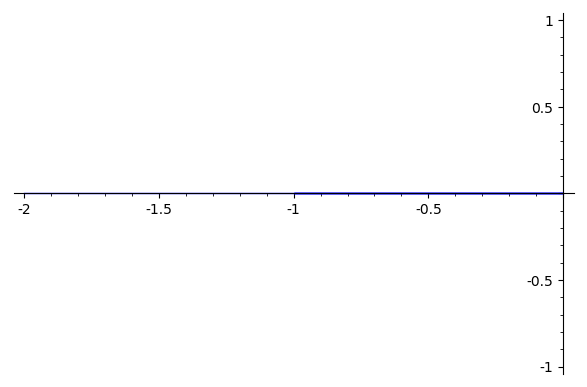

In [122]:
from pylab import cumsum, array
startingPoint = (0,0)
drunkardsPath = [startingPoint] # start list with starting point tuple
n = 10
pLeft, pRight = 0.25, 0.25 # assign some probabilities to left and right
probs = [pLeft, pRight] # list of probabilities left and right only so far
movementFunctions = [makeLeftTurnPoint, makeRightTurnPoint] # list of corresponding movement functions
cumProbs = cumsum(probs).tolist() # cumulative probabilities
prns = [random() for i in range(n)] # pseudo-random Uniform(0,1) samples
for u in prns:                        # for each pseudo-random u
    for i in range(len(cumProbs)):    # for each cumulative direction probability
        if (u < cumProbs[i]):         # check if u is less than this direction cumulative probability
            pointToAdd = movementFunctions[i](drunkardsPath)  # if so, find new point to go to
            drunkardsPath.append(pointToAdd)                  # add it to the path
            break    # the break statement breaks out of a loop, in the case out of the for-loop
print(drunkardsPath)
# out of both loops, have a path, so plot it            
linePlotter(drunkardsPath)

A bit boring?   A bit one-dimensional?  See if you can add up and down to the Drunkard's repetoire.  You will need to:

- Start by making adding some functions to make an up turn and a down turn, exactly as we have for making a left turn and a right turn.
- Add probabilities for up and down into the code.
- Remember to add your functions for up and down into the function list.

Try it and see!

This is a warmup for an assignment - you can do and show me that you comprehend it.

# Simple Random Walks 

Simple random walks on $\mathbb{Z}^d$ when scaled appropriately leads to *Browninan motion* that can be formalized as the *Weiner process*. This is a primary ingredient in stochastic calculus.

In [123]:
showURL("https://en.wikipedia.org/wiki/Wiener_process",400)

## Simulating Multiple Independent Random Walkers in 2D-space over Time

Such simulations are the starting point for traffic engineering simulations used to optimise city-planning of transportation networks. These random walkers can be made dependent and also made to move on a road network with right speeds, etc. Here we look at the vanilla example.

### A Comment-it YouTry!

Try to comprehend this code and add comments to each line. This is mostly an opportunity for you to see for yourself what you should be able to already do, in terms of simulation.

**Remark:** When **mathematical models become too complicated** to explain a complex phenomenon of interest (eg. traffic or supply-chain management, predictive maintenance of an expensive component in a national grid/system of power plant, etc.), you have little choice but to resort to **modular arithmetic based simulations with pseudo-random numbers**. von Neumann invented such a pseudo-random number generator called the [middle-square method](https://en.wikipedia.org/wiki/Middle-square_method#History) for solving complex problems in the Manhattan Project. Finally, statistical inference methods you are about to see can be combined with simulation to conduct **simulation-intensive statistical inference**!

In [124]:
def makeRandomWalkTraj(ID=int(0), txy0 = [float(0.0),float(0.0),float(0.0)], steps = int(10),\
                       xy_move = float(1.0),t_rate = float(1.0)):
    itxy=[ID, txy0[0], txy0[1], txy0[2]]
    traj=[itxy]
    for i in range(steps):
        t = itxy[1] + (float(-1.0)/t_rate)*log(float(1.0) - random())
        x = itxy[2]+xy_move*random()*float(2.0)+float(-1.0)
        y = itxy[3]+xy_move*random()*float(2.0)+float(-1.0)
        itxy=[itxy[0], t , x, y]
        traj.append(itxy)
    return traj

ss=float(10.0) # spatial scale
t = makeRandomWalkTraj(23,\
                       [random()*float(2.0)+float(-1.0),random()*float(2.0*ss)+float(-1.0*ss),random()*float(2.0*ss)+float(-1.0*ss)],\
                       int(10),float(1.0),float(1.0))
t

[[23, -0.35289536513837616, -1.520225803941182, 8.951715941966278],
 [23, 2.1302396351200126, -1.7483282209716002, 9.759356583041761],
 [23, 2.519676475198993, -2.220100918354284, 8.97431075010322],
 [23, 3.1029502626303525, -2.125304541510417, 8.077795700162767],
 [23, 3.5244407279236625, -1.2246647663746952, 8.848834244802898],
 [23, 4.479321462144133, -0.6488599081256443, 9.279620892916705],
 [23, 5.658241004128107, 0.11178237264636182, 8.843207221484809],
 [23, 6.934783542074995, -0.21764529066558014, 8.70303526866192],
 [23, 7.287321875475167, 0.09537142769551288, 8.27787940279894],
 [23, 7.303076249710688, 0.062000294072554585, 7.700834448587841],
 [23, 9.331351966480474, 0.3547175138557628, 8.115398540833713]]

In [125]:
import numpy as np
# BE PATIENT - this can take a minute or so
def makeTraj3DImage(tr,rgb):
    a = np.array(tr)
    p=points(a[:,1:4],size=5,rgbcolor=rgb,opacity=.5)
    p+=line(a[:,1:4],size=5,rgbcolor=rgb,opacity=.5)
    return p

numOfIndividuals=20
numSteps=60
ss=float(1.0) # spatial scale
Ts=[]
for i in range(0,numOfIndividuals):
    t = makeRandomWalkTraj(i,\
        [random()*float(2.0)+float(-1.0),random()*float(2.0*ss)+float(-1.0*ss),random()*float(2.0*ss)+float(-1.0*ss)],\
         int(numSteps),float(1.0),float(1.0))
    Ts.append(t)

rgbRandomColorMap = [(random(),random(),random()) for i in range(numOfIndividuals)]
p=makeTraj3DImage(Ts[0], rgbRandomColorMap[0])
for i in range(1,numOfIndividuals):
    p+=makeTraj3DImage(Ts[i], rgbRandomColorMap[i])
p.show()

Graphics3d Object